# 03 - PnL and Risk Analysis

This notebook illustrates how to:

- Take walk-forward results or saved returns
- Build a portfolio PnL series
- Compute Sharpe / Sortino / drawdowns
- Visualize the equity curve



In [1]:
import sys
from pathlib import Path

ROOT = Path("..").resolve()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

In [3]:
import pickle
from pathlib import Path

WF_PATH = Path("../signals/signal_files/wf_results.pkl")

with open(WF_PATH, "rb") as f:
    wf_results = pickle.load(f)

print("Loaded wf_results from", WF_PATH)

Loaded wf_results from ../signals/signal_files/wf_results.pkl


In [4]:
import matplotlib.pyplot as plt
import numpy as np

from backtester.portfolio import build_portfolio
from backtester.backtest import backtest_from_walk_forward
from research.evaluation import summarize_performance, equity_from_returns

# Example: if you already have walk_forward results loaded as `wf_results`
# from 02_model_training.ipynb, you can reuse them here.

try:
    wf_results  # type: ignore[name-defined]
    print("Using wf_results from previous notebook run.")
except NameError:
    raise RuntimeError("Run 02_model_training.ipynb first to compute wf_results.")

portfolio_res = backtest_from_walk_forward(wf_results)
portfolio_res.stats


Using wf_results from previous notebook run.


PerformanceStats(sharpe=0.03429499352499494, sortino=0.05496196385708383, max_drawdown=-0.9973430633544922, mean=8.949273615144193e-05, vol=0.04142450541257858)

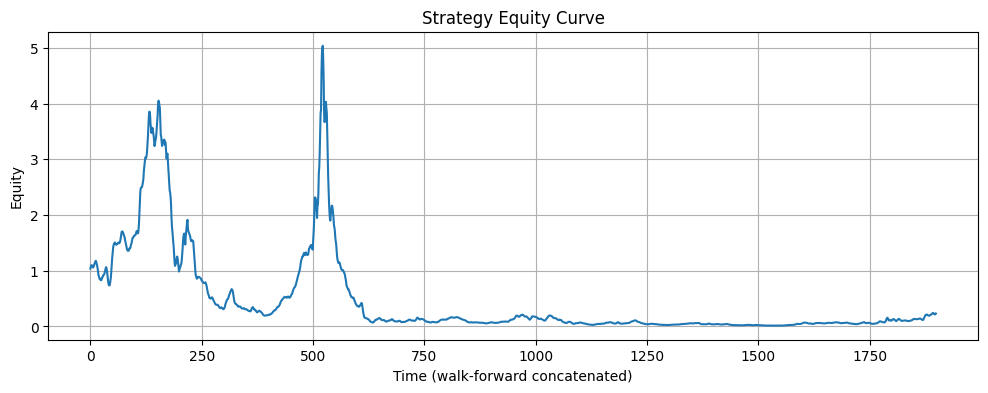

In [5]:
# Plot equity curve

eq = portfolio_res.equity_curve

plt.figure(figsize=(12, 4))
plt.plot(eq)
plt.title("Strategy Equity Curve")
plt.xlabel("Time (walk-forward concatenated)")
plt.ylabel("Equity")
plt.grid(True)
plt.show()


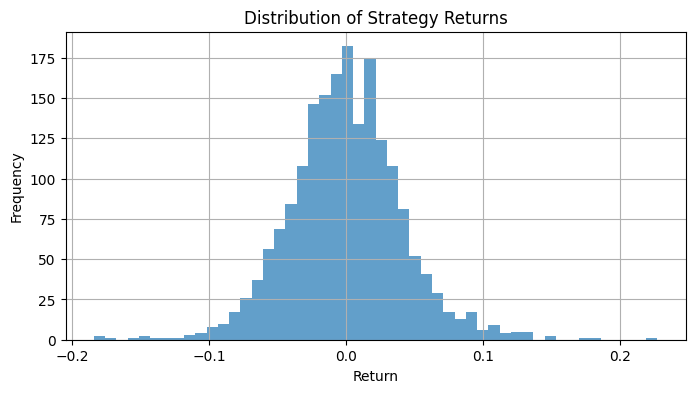

In [6]:
# Inspect distribution of returns

rets = portfolio_res.returns

plt.figure(figsize=(8, 4))
plt.hist(rets, bins=50, alpha=0.7)
plt.title("Distribution of Strategy Returns")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [7]:
# Example of saving equity curve to CSV for the Streamlit dashboard

import pandas as pd

pnl_df = pd.DataFrame({
    "timestamp": pd.RangeIndex(start=0, stop=len(eq), step=1),
    "equity": eq,
})

pnl_df.to_csv("../signals/signal_files/backtest_pnl.csv", index=False)
print("Saved to ../signals/signal_files/backtest_pnl.csv")


Saved to ../signals/signal_files/backtest_pnl.csv
